[103, 5, 33, 93, 18, 50, 9, 139, 121, 47, 115, 88, 68, 149, 162, 91, 45, 167, 172, 144]
[384, 396, 147, 275, 118, 456, 231, 490, 382, 470, 452, 100, 321, 129, 405, 69, 217, 133, 91, 334]


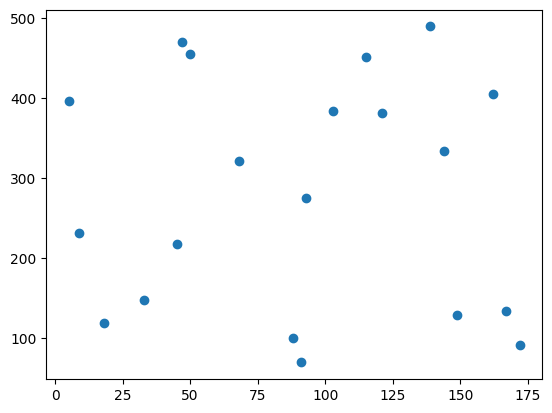

-0.07946898102026156


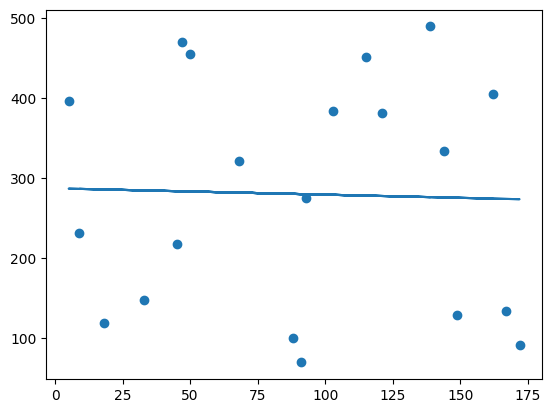

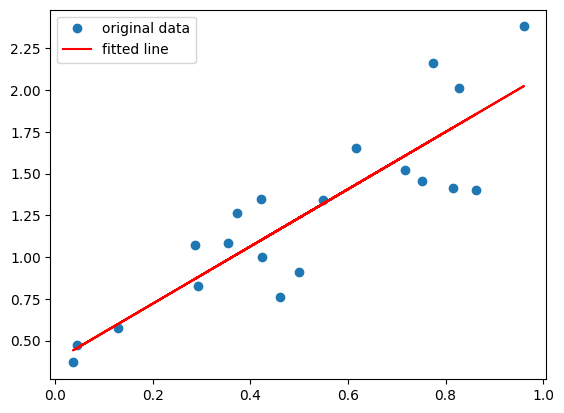

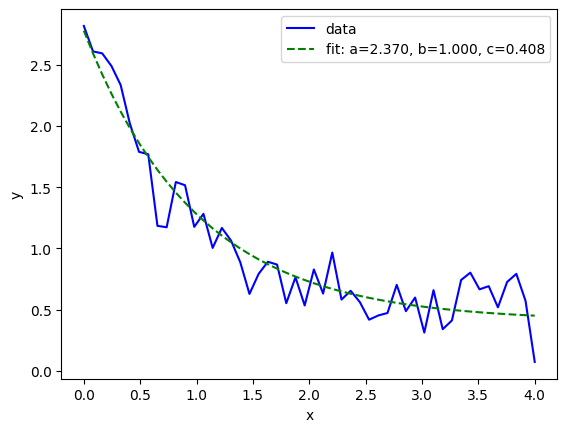

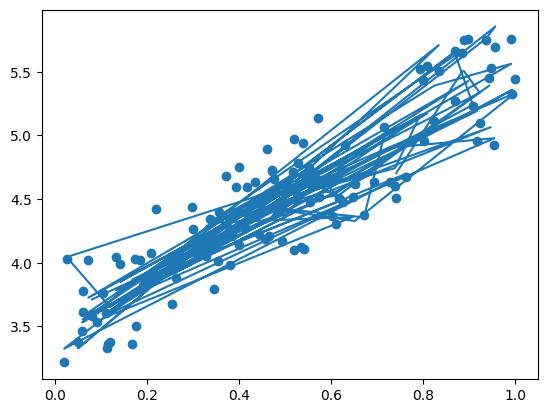

In [19]:
#Our goal is to learn how to solve linear regression problems and understand the process thoroughly.
#In Python, we import the libraries that will help us do rest of the tasks

#If you are too bold and want do not want to follow me, solve the following:
#Download the dataset and read the problem here:https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview. Try and develop an algorithm to solve the problem.
#While you could find solved codes in Python for the problem, it does not help if you borrow someone else's ideas.

import matplotlib.pyplot as plt
import random
from scipy import stats
import numpy as np
from scipy.optimize import curve_fit

#let's generate some 20 random numbers. You can play with these functions too to see what works and what does not. Even change the random numbers to generate numbers from a particular distribution, e.g., Gaussian

x = random.sample(range(1, 200), 20) #randomly generate 20 random numbers
y = random.sample(range(1, 500), 20) #randomly generate 20 random numbers
print(x)
print(y)
plt.scatter(x, y)
plt.show()

#You must read here  to understand the function below: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope)

#Remeber W.x+b
def Regressor(x):
  return slope * x + intercept

#Create a list.
LinearRegression = list(map(Regressor, x))

plt.scatter(x, y)
plt.plot(x, LinearRegression)
plt.show()

#Now, lets try and fix the problem of points above.
rng = np.random.default_rng()
x = rng.random(20)
y = 1.6*x + rng.random(20)

Residuals = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, Residuals.intercept + Residuals.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

#Let's try some non-linear fitting
#The function below loosely follows a Normal/Gaussian Distribution
#Credit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def NormalFunction(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0, 4, 50)
y = NormalFunction(x, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'b-', label='data')

popt, pcov = curve_fit(NormalFunction, x, ydata)
popt, pcov = curve_fit(NormalFunction, x, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(x, NormalFunction(x, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#TODO:
#1. Learn how to do train and test splitting. Reference: https://www.w3schools.com/python/python_ml_train_test.asp
#2. Learn how to address overfitting problem. Reference: https://medium.datadriveninvestor.com/the-problem-of-overfitting-in-regression-and-how-to-avoid-it-dac4d49d836f
#3. Learn how to address underfitting problem. Reference: https://itnext.io/linear-regression-how-to-overcome-underfitting-with-locally-weight-linear-regression-lwlr-e867f0cde4a4

#Automatically generated code (Google Bard):
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some noisy data
x = np.random.rand(100, 1)
y = 2 * x + 3 + np.random.rand(100, 1)

# Create a polynomial feature transformer
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=100)

# Transform the data
X_poly = poly.fit_transform(x)

# Train a linear regression model on the transformed data
reg = LinearRegression().fit(X_poly, y)

# Plot the original data and the overfitted line
plt.scatter(x, y)
plt.plot(x, reg.predict(X_poly))
plt.show()